In [1]:
import pandas as pd 
import numpy as np

#데이터 불러오기

df_delete = pd.read_csv('dataset/delete_null.csv')
df_mean = pd.read_csv('dataset/mean_null.csv')
df_mode = pd.read_csv('dataset/mode_null.csv')

In [2]:
#스케일링 도중 생성된 결측행 제거
df_delete = df_delete.dropna()
df_mode = df_mode.dropna()
df_mean = df_mean.dropna()


### Trainset / testset 분할

In [3]:
X = df_delete.drop(['Total_slp_wd_standard','SitTime_standard','Total_slp_wd_scaled','SitTime_scaled','BMI'],axis='columns') 
y = df_delete['BMI']

In [4]:
X

,sex,age,D_1_1,Total_slp_wd,BP1,BO1,BE5_1,BP5,SitTime
0,1.0,13.0,3.0,480.0,4.0,5.0,1.0,2.0,540.0
1,1.0,16.0,2.0,420.0,3.0,3.0,1.0,2.0,540.0
2,2.0,15.0,2.0,540.0,3.0,4.0,1.0,2.0,600.0
3,2.0,17.0,3.0,540.0,3.0,4.0,1.0,1.0,1020.0
4,1.0,12.0,2.0,480.0,3.0,2.0,1.0,2.0,600.0
...,...,...,...,...,...,...,...,...,...
1520,2.0,16.0,2.0,600.0,4.0,3.0,1.0,2.0,660.0
1521,2.0,16.0,2.0,720.0,3.0,3.0,1.0,2.0,720.0
1522,1.0,14.0,3.0,570.0,3.0,3.0,1.0,2.0,420.0
1523,2.0,12.0,2.0,660.0,3.0,4.0,1.0,2.0,630.0


In [5]:
y.value_counts()

0.0    1268
1.0     242
Name: BMI, dtype: int64

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# test_size : 테스트 데이터셋의 비율(float)이나 갯수(int) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=3)

In [7]:
y_test.value_counts()

0.0    317
1.0     61
Name: BMI, dtype: int64

In [10]:
X_train

,sex,age,D_1_1,Total_slp_wd,BP1,BO1,BE5_1,BP5,SitTime
1185,2.0,12.0,3.0,420.0,3.0,1.0,1.0,2.0,600.0
795,1.0,17.0,3.0,480.0,3.0,2.0,6.0,2.0,960.0
585,2.0,15.0,4.0,480.0,3.0,4.0,1.0,1.0,720.0
891,1.0,16.0,2.0,480.0,3.0,3.0,1.0,2.0,480.0
53,2.0,13.0,1.0,510.0,3.0,2.0,1.0,2.0,780.0
...,...,...,...,...,...,...,...,...,...
380,2.0,16.0,2.0,510.0,3.0,4.0,1.0,2.0,780.0
1341,1.0,12.0,2.0,620.0,4.0,2.0,1.0,2.0,690.0
740,2.0,14.0,2.0,780.0,3.0,3.0,1.0,2.0,600.0
1060,2.0,13.0,2.0,690.0,3.0,3.0,1.0,2.0,720.0


## 데이터 표준화

연속형 변수와 명목형 또는 순서형 변수 간의 간극을 좁히기 위해서 데이터를 모두 0과 1 사이의 범위로 통일화 시켜 SVM모델의 스케일링 문제를 해결해주기 위함이다.

In [45]:
from sklearn.preprocessing import MinMaxScaler
transformer = MinMaxScaler()
standard = transformer.fit_transform(X_train)
standard

array([[1.        , 0.        , 0.5       , ..., 0.        , 1.        ,
        0.38461538],
       [0.        , 0.83333333, 0.5       , ..., 1.        , 1.        ,
        0.84615385],
       [1.        , 0.5       , 0.75      , ..., 0.        , 0.        ,
        0.53846154],
       ...,
       [1.        , 0.33333333, 0.25      , ..., 0.        , 1.        ,
        0.38461538],
       [1.        , 0.16666667, 0.25      , ..., 0.        , 1.        ,
        0.53846154],
       [0.        , 0.66666667, 0.        , ..., 0.        , 1.        ,
        0.38461538]])

# 모델링 (linearSVM) 

커널을 사용한 SVM모델은 변수중요도를 볼 수 없어, 설명할 수 없는 제약이 존재함<br>
따라서, 선형 SVM 모델을 사용

In [19]:

#최적 파라미터 값 찾기
#param_grid = [ { 'C' : [0.1, 1, 10 ], 'kernel': [ 'rbf' ], 'gamma' : [ 1,0.1 ]},
#{ 'C' : [0.1, 1, 10 ], 'kernel': [ 'poly' ], 'gamma' : [ 1,0.1 ]},
#             

#def svm_model(train_x, train_y,test_x, test_y,cv):
 #             print("데이터셋 : ", train_x ," &  cv: " , cv)
  #            grid_search = GridSearchCV(SVC(),param_grid, cv=cv, return_train_score = True)
   #           grid_search.fit(train_x, train_y)
    #          print("best parameters : {}".format(grid_search.best_params_))

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC 

param_grid = [ { 'C' : [0.1,0.2,0.25,0.3,0.8,1,2,4,10 ], 'kernel': [ 'linear' ]}]
grid_search = GridSearchCV(SVC(),param_grid, cv=2, return_train_score = True)
grid_search.fit(standard, y_train)
print("best parameters : {}".format(grid_search.best_params_))

best parameters : {'C': 4, 'kernel': 'linear'}


In [48]:
print('최적 하이퍼 파라미터: ', grid_search.best_params_)
print('최고 예측 정확도: {:.4f}'.format(grid_search.best_score_))

최적 하이퍼 파라미터:  {'C': 4, 'kernel': 'linear'}
최고 예측 정확도: 0.8931


## 그리드 서치 결과값

In [49]:
scores_df = pd.DataFrame(grid_search.cv_results_)
scores_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,mean_train_score,std_train_score
0,0.003989,9.974241e-04,0.001496,4.990101e-04,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.840989,0.839223,0.840106,0.000883,8,0.839223,0.840989,0.840106,0.000883
1,0.002990,3.576279e-07,0.001496,4.980564e-04,0.2,linear,"{'C': 0.2, 'kernel': 'linear'}",0.840989,0.839223,0.840106,0.000883,8,0.839223,0.842756,0.840989,0.001767
2,0.002991,9.967089e-04,0.000998,4.768372e-07,0.25,linear,"{'C': 0.25, 'kernel': 'linear'}",0.863958,0.855124,0.859541,0.004417,7,0.867491,0.862191,0.864841,0.002650
3,0.002992,2.384186e-07,0.001496,4.985332e-04,0.3,linear,"{'C': 0.3, 'kernel': 'linear'}",0.863958,0.863958,0.863958,0.000000,6,0.867491,0.867491,0.867491,0.000000
4,0.003485,1.502872e-03,0.001499,4.700422e-04,0.8,linear,"{'C': 0.8, 'kernel': 'linear'}",0.892226,0.885159,0.888693,0.003534,2,0.883392,0.890459,0.886926,0.003534
5,0.002975,1.014471e-03,0.001995,7.152557e-07,1,linear,"{'C': 1, 'kernel': 'linear'}",0.892226,0.883392,0.887809,0.004417,4,0.895760,0.886926,0.891343,0.004417
6,0.003475,5.153418e-04,0.001529,5.004406e-04,2,linear,"{'C': 2, 'kernel': 'linear'}",0.885159,0.892226,0.888693,0.003534,2,0.897527,0.901060,0.899293,0.001767
7,0.002509,4.788637e-04,0.001481,4.770756e-04,4,linear,"{'C': 4, 'kernel': 'linear'}",0.888693,0.897527,0.893110,0.004417,1,0.901060,0.893993,0.897527,0.003534
8,0.004505,1.480103e-03,0.000996,8.344650e-07,10,linear,"{'C': 10, 'kernel': 'linear'}",0.881625,0.890459,0.886042,0.004417,5,0.890459,0.895760,0.893110,0.002650


### 그리드 서치 결과값 mean_Test_score 순으로 정렬

In [50]:
df_results = scores_df[['params', 'mean_test_score', 'rank_test_score', 
           'split0_test_score', 'split1_test_score']]
df_results.sort_values(by='rank_test_score')

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score
7,"{'C': 4, 'kernel': 'linear'}",0.893110,1,0.888693,0.897527
4,"{'C': 0.8, 'kernel': 'linear'}",0.888693,2,0.892226,0.885159
6,"{'C': 2, 'kernel': 'linear'}",0.888693,2,0.885159,0.892226
5,"{'C': 1, 'kernel': 'linear'}",0.887809,4,0.892226,0.883392
8,"{'C': 10, 'kernel': 'linear'}",0.886042,5,0.881625,0.890459
3,"{'C': 0.3, 'kernel': 'linear'}",0.863958,6,0.863958,0.863958
2,"{'C': 0.25, 'kernel': 'linear'}",0.859541,7,0.863958,0.855124
0,"{'C': 0.1, 'kernel': 'linear'}",0.840106,8,0.840989,0.839223
1,"{'C': 0.2, 'kernel': 'linear'}",0.840106,8,0.840989,0.839223


# 모델 퍼모먼스 함수

### 실제 현장에서 얼마나 적용되는지 판단을 위해, precision, recall, f1_score, auc 등의 척도를 도출

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
def model_evaluation(label, predict):
    cf_matrix = confusion_matrix(label, predict)
    Accuracy = (cf_matrix[0][0] + cf_matrix[1][1]) / sum(sum(cf_matrix))
    Precision = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[0][1])
    Recall = cf_matrix[1][1] / (cf_matrix[1][1] + cf_matrix[1][0])
    Specificity = cf_matrix[0][0] / (cf_matrix[0][0] + cf_matrix[0][1])
    F1_Score = (2 * Recall * Precision) / (Recall + Precision)
    F2_Score = (5 * Recall * Precision) / (Recall + 4*Precision)
    
    print("Accuracy: ", Accuracy)
    print("Precision: ", Precision)
    print("Recall: ", Recall)
    print("Specificity: ", Specificity)
    print("F1-Score: ", F1_Score)
    print("F2-Score: ", F2_Score)
    print("auc score: " , roc_auc_score(label, np.round(predict,0)))


In [53]:
transformer = MinMaxScaler()
X_test = transformer.fit_transform(X_test)


In [54]:
predicted = grid_search.predict(X_test)
print(confusion_matrix(y_test, predicted))
print(model_evaluation(y_test, predicted))

[[305  12]
 [ 26  35]]
Accuracy:  0.8994708994708994
Precision:  0.7446808510638298
Recall:  0.5737704918032787
Specificity:  0.9621451104100947
F1-Score:  0.6481481481481481
F2-Score:  0.6013745704467354
auc score:  0.7679578011066867
None


# 변수 중요도

참조 https://eli5.readthedocs.io/en/latest/blackbox/permutation_importance.html

In [57]:
import eli5
from eli5.sklearn import PermutationImportance 

perm = PermutationImportance(grid_search, random_state = 0).fit(X_test,y_test) 
df_impt = eli5.show_weights(perm, top = 80, feature_names = X_train.columns.tolist())

# 변수중요도 추출
df_impt

Weight,Feature
0.1540 ± 0.0122,BO1
0.0460 ± 0.0208,sex
0.0074 ± 0.0062,age
0.0063 ± 0.0098,Total_slp_wd
0.0032 ± 0.0040,D_1_1
0 ± 0.0000,SitTime
0 ± 0.0000,BE5_1
-0.0005 ± 0.0021,BP5
-0.0011 ± 0.0054,BP1


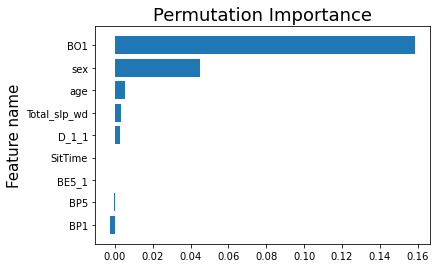

In [59]:
# 변수중요도 시각화
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

result = permutation_importance(grid_search, X_test,y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

plt.barh(X_train.columns[sorted_idx], sorted(result.importances_mean))
plt.title('Permutation Importance', fontsize=18)
plt.ylabel('Feature name', fontsize=15)
plt.show()